# Import Tweets

In [1]:
# Import all libraries 
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt

In [2]:
trump_tweets = pd.read_csv("trump_tweets_cleaned.csv")

In [3]:
trump_tweets

,id,cleaned_text,favorites,retweets,date,date_new,date_part,time_part,hour,year,month,sentiment_score,tweet_length,compound,entity,entity_type
0,9.384230e+17,MAKE AMERICA GREAT AGAIN!,157963,37189,2017-06-12 15:00:00,2017-06-12 23:00:00,2017-06-12,23:00:00,23,2017,6,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",25,0.6588,[],[]
1,9.391890e+17,MAKE AMERICA GREAT AGAIN!,56596,11433,2017-08-12 17:46:00,2017-08-13 01:46:00,2017-08-13,01:46:00,1,2017,8,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",26,0.6588,[],[]
2,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",16,0.4199,['Rand'],['ORG']
3,9.253890e+17,Thank you @LuisRiveraMarin!,23521,4574,2017-10-31 15:48:00,2017-10-31 23:48:00,2017-10-31,23:48:00,23,2017,10,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",28,0.4199,[],[]
4,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",54,0.2960,"['Fort Myer', 'Arlington', 'Virginia', '➡']","['GPE', 'GPE', 'GPE', 'ORG']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,9.862190e+17,"Employment is up, Taxes are DOWN. Enjoy! I am ...",106514,19661,2018-04-17 12:24:00,2018-04-17 20:24:00,2018-04-17,20:24:00,20,2018,4,"{'neg': 0.07, 'neu': 0.757, 'pos': 0.173, 'com...",546,0.8942,"['Florida', 'Abe', 'Japan', 'Working on Trade ...","['GPE', 'PERSON', 'GPE', 'ORG', 'PERSON', 'GPE..."
5084,9.791090e+17,I am pleased to announce that I intend to nomi...,66173,13399,2018-03-28 21:31:00,2018-03-29 05:31:00,2018-03-29,05:31:00,5,2018,3,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",305,0.9565,"['Ronny L. Jackson', 'MD', 'Veterans Affairs',...","['PERSON', 'ORG', 'ORG', 'ORG', 'PERSON', 'ORG..."
5085,9.597990e+17,Rasmussen just announced that my approval rati...,132165,30235,2018-03-02 14:40:00,2018-03-02 22:40:00,2018-03-02,22:40:00,22,2018,3,"{'neg': 0.112, 'neu': 0.72, 'pos': 0.168, 'com...",533,0.7250,"['49%', 'Russian', 'Hunt', 'one year', 'Americ...","['PERCENT', 'NORP', 'PERSON', 'DATE', 'NORP']"
5086,9.576040e+17,Somebody please inform Jay-Z that because of m...,202727,49876,2018-01-28 13:18:00,2018-01-28 21:18:00,2018-01-28,21:18:00,21,2018,1,"{'neg': 0.145, 'neu': 0.757, 'pos': 0.097, 'co...",388,-0.5882,"['Jay-Z', 'Black Unemployment', 'many decades'...","['PERSON', 'ORG', 'DATE', 'GPE', 'ORG', 'GPE',..."


In [4]:
trump_tweets['date_new'] = pd.to_datetime(trump_tweets['date_new'])
trump_tweets.rename(columns={"date_new": "tweet_datetime"}, inplace=True)

In [5]:
trump_tweets.set_index('tweet_datetime', inplace=True, drop=False)
trump_tweets.index.name = None

In [6]:
trump_tweets = trump_tweets.between_time(datetime.time(4), datetime.time(20), include_start=True, include_end=True)

In [7]:
trump_tweets

,id,cleaned_text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month,sentiment_score,tweet_length,compound,entity,entity_type
2017-11-28 10:50:00,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",16,0.4199,['Rand'],['ORG']
2017-08-22 09:00:00,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",54,0.2960,"['Fort Myer', 'Arlington', 'Virginia', '➡']","['GPE', 'GPE', 'GPE', 'ORG']"
2017-05-09 07:01:00,8.939700e+17,Thank you Nicole!,43367,8275,2017-05-08 23:01:00,2017-05-09 07:01:00,2017-05-09,07:01:00,7,2017,5,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",18,0.4199,['Nicole'],['PERSON']
2017-03-08 04:44:00,8.819770e+17,Thank you to Shawn Steel for the nice words on...,50956,7465,2017-03-07 20:44:00,2017-03-08 04:44:00,2017-03-08,04:44:00,4,2017,3,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",56,0.6486,['Shawn Steel'],['PERSON']
2017-06-22 19:11:00,8.778460e+17,Great night in Iowa - special people. Thank you!,56446,8039,2017-06-22 11:11:00,2017-06-22 19:11:00,2017-06-22,19:11:00,19,2017,6,"{'neg': 0.0, 'neu': 0.343, 'pos': 0.657, 'comp...",48,0.8622,"['night', 'Iowa']","['TIME', 'GPE']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-23 09:13:00,9.990960e+17,If the person placed very early into my campai...,78529,20098,2018-05-23 01:13:00,2018-05-23 09:13:00,2018-05-23,09:13:00,9,2018,5,"{'neg': 0.052, 'neu': 0.847, 'pos': 0.1, 'comp...",513,0.6792,"['Collusion', 'Russia', 'Crooked Hillary', 'Be...","['ORG', 'GPE', 'PERSON', 'PERSON']"
2018-04-20 18:34:00,9.874600e+17,So General Michael Flynn’s life can be totally...,93569,25259,2018-04-20 10:34:00,2018-04-20 18:34:00,2018-04-20,18:34:00,18,2018,4,"{'neg': 0.081, 'neu': 0.891, 'pos': 0.028, 'co...",539,-0.6689,"['Michael Flynn', 'Shadey James Comey', 'Leak'...","['PERSON', 'PERSON', 'PERSON', 'ORDINAL', 'GPE..."
2018-04-20 06:30:00,9.870960e+17,"My thoughts, prayers and condolences are with ...",62645,16081,2018-04-19 22:30:00,2018-04-20 06:30:00,2018-04-20,06:30:00,6,2018,4,"{'neg': 0.084, 'neu': 0.755, 'pos': 0.161, 'co...",447,0.6900,"['two', '@GCSOFlorida', 'HEROES', 'today', 'Sa...","['CARDINAL', 'ORG', 'ORG', 'DATE', 'PERSON', '..."
2018-04-18 05:34:00,9.863570e+17,Today’s Court decision means that Congress mus...,56749,12426,2018-04-17 21:34:00,2018-04-18 05:34:00,2018-04-18,05:34:00,5,2018,4,"{'neg': 0.314, 'neu': 0.577, 'pos': 0.109, 'co...",357,-0.9493,"['Today', 'Congress', 'Congress', 'House', 'Se...","['DATE', 'ORG', 'ORG', 'ORG', 'ORG', 'ORG']"


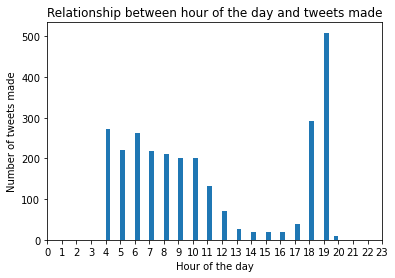

In [8]:

plt.hist(trump_tweets.hour, bins = 48)
plt.xlim(left=0, right=23)
plt.title('Relationship between hour of the day and tweets made')
plt.xlabel('Hour of the day')
plt.ylabel('Number of tweets made')
plt.xticks(range(0,24))
plt.show()

# Import Stock Prices

In [9]:
stock_price = pd.read_csv("stock_price_cleaned.csv")

In [10]:
stock_price.rename(columns={"DATE_TIME_M": "datetime", "PRICE": "price"}, inplace=True)
stock_price['datetime']= pd.to_datetime(stock_price['datetime'])
stock_price['date'] = stock_price['datetime'].apply(lambda x: x.date())

In [11]:
stock_price

,datetime,price,date
0,2017-01-20 04:00:00,226.5000,2017-01-20
1,2017-01-20 04:01:00,226.4975,2017-01-20
2,2017-01-20 04:02:00,226.4950,2017-01-20
3,2017-01-20 04:03:00,226.4925,2017-01-20
4,2017-01-20 04:04:00,226.4900,2017-01-20
...,...,...,...
683266,2018-12-31 19:56:00,250.0600,2018-12-31
683267,2018-12-31 19:57:00,250.0700,2018-12-31
683268,2018-12-31 19:58:00,250.1000,2018-12-31
683269,2018-12-31 19:59:00,250.0700,2018-12-31


# Get End of Day (8pm) Stock Prices

In [12]:
end_of_day_prices = stock_price[stock_price['datetime'].apply(lambda x: x.time()) == datetime.time(20)]
end_of_day_prices['datetime'] = end_of_day_prices['datetime'].apply(lambda x: x.date()) 
end_of_day_prices.rename(columns={"price": "eod_price", "datetime": "eod_date"}, inplace=True)

C:\Users\brgoh\anaconda33\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\brgoh\anaconda33\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
end_of_day_prices.head()

,eod_date,eod_price,date
960,2017-01-20,226.740000,2017-01-20
1921,2017-01-21,226.542857,2017-01-21
2882,2017-01-22,226.345714,2017-01-22
3843,2017-01-23,226.150000,2017-01-23
4804,2017-01-24,227.600000,2017-01-24


# Join Stock Prices to EOD Price

In [14]:
stock_price = stock_price.merge(end_of_day_prices, left_on='date', right_on='eod_date')
stock_price.drop(columns=['date_x', 'date_y', 'eod_date'], inplace=True)

In [15]:
stock_price.head()

,datetime,price,eod_price
0,2017-01-20 04:00:00,226.5000,226.74
1,2017-01-20 04:01:00,226.4975,226.74
2,2017-01-20 04:02:00,226.4950,226.74
3,2017-01-20 04:03:00,226.4925,226.74
4,2017-01-20 04:04:00,226.4900,226.74


# Get Stock Price Difference X mins after

In [16]:
# Change this variable for different X min differences
x_mins = 5

In [17]:
stock_price[f"datetime_{x_mins}mins_before"] = stock_price["datetime"] - pd.Timedelta(f"{x_mins} min")

In [18]:
stock_price_merged = stock_price.merge(stock_price, how='inner', left_on=[f"datetime_{x_mins}mins_before"], right_on=["datetime"])
stock_price_merged.drop(columns=["datetime_y", f"datetime_{x_mins}mins_before_y", "eod_price_y"], inplace=True)

In [19]:
stock_price_merged

,datetime_x,price_x,eod_price_x,datetime_5mins_before_x,price_y
0,2017-01-20 04:05:00,226.520000,226.74,2017-01-20 04:00:00,226.500000
1,2017-01-20 04:06:00,226.526667,226.74,2017-01-20 04:01:00,226.497500
2,2017-01-20 04:07:00,226.533333,226.74,2017-01-20 04:02:00,226.495000
3,2017-01-20 04:08:00,226.540000,226.74,2017-01-20 04:03:00,226.492500
4,2017-01-20 04:09:00,226.530000,226.74,2017-01-20 04:04:00,226.490000
...,...,...,...,...,...
679711,2018-12-31 19:56:00,250.060000,249.92,2018-12-31 19:51:00,250.060000
679712,2018-12-31 19:57:00,250.070000,249.92,2018-12-31 19:52:00,250.090000
679713,2018-12-31 19:58:00,250.100000,249.92,2018-12-31 19:53:00,250.100000
679714,2018-12-31 19:59:00,250.070000,249.92,2018-12-31 19:54:00,250.086667


In [20]:
stock_price_merged.rename(columns={"datetime_x": f"datetime_{x_mins}mins_after", "price_x": f"price_{x_mins}mins_after", f"datetime_{x_mins}mins_before_x": "datetime_now", "price_y": "price_now", "eod_price_x": "eod_price"}, inplace=True)

In [21]:
stock_price_merged

,datetime_5mins_after,price_5mins_after,eod_price,datetime_now,price_now
0,2017-01-20 04:05:00,226.520000,226.74,2017-01-20 04:00:00,226.500000
1,2017-01-20 04:06:00,226.526667,226.74,2017-01-20 04:01:00,226.497500
2,2017-01-20 04:07:00,226.533333,226.74,2017-01-20 04:02:00,226.495000
3,2017-01-20 04:08:00,226.540000,226.74,2017-01-20 04:03:00,226.492500
4,2017-01-20 04:09:00,226.530000,226.74,2017-01-20 04:04:00,226.490000
...,...,...,...,...,...
679711,2018-12-31 19:56:00,250.060000,249.92,2018-12-31 19:51:00,250.060000
679712,2018-12-31 19:57:00,250.070000,249.92,2018-12-31 19:52:00,250.090000
679713,2018-12-31 19:58:00,250.100000,249.92,2018-12-31 19:53:00,250.100000
679714,2018-12-31 19:59:00,250.070000,249.92,2018-12-31 19:54:00,250.086667


In [22]:
stock_price_merged[f'{x_mins}mins_price_diff_abs'] = stock_price_merged[f'price_{x_mins}mins_after'] - stock_price_merged['price_now']

stock_price_merged[f'{x_mins}mins_price_diff_perc'] = (stock_price_merged[f'price_{x_mins}mins_after'] - stock_price_merged['price_now']) / stock_price_merged['price_now']

stock_price_merged['eod_price_diff_abs'] = stock_price_merged['eod_price'] - stock_price_merged['price_now']

stock_price_merged['eod_price_diff_perc'] = (stock_price_merged['eod_price'] - stock_price_merged['price_now']) / stock_price_merged['price_now']

In [23]:
stock_price_merged

,datetime_5mins_after,price_5mins_after,eod_price,datetime_now,price_now,5mins_price_diff_abs,5mins_price_diff_perc,eod_price_diff_abs,eod_price_diff_perc
0,2017-01-20 04:05:00,226.520000,226.74,2017-01-20 04:00:00,226.500000,0.020000,0.000088,0.240000,0.001060
1,2017-01-20 04:06:00,226.526667,226.74,2017-01-20 04:01:00,226.497500,0.029167,0.000129,0.242500,0.001071
2,2017-01-20 04:07:00,226.533333,226.74,2017-01-20 04:02:00,226.495000,0.038333,0.000169,0.245000,0.001082
3,2017-01-20 04:08:00,226.540000,226.74,2017-01-20 04:03:00,226.492500,0.047500,0.000210,0.247500,0.001093
4,2017-01-20 04:09:00,226.530000,226.74,2017-01-20 04:04:00,226.490000,0.040000,0.000177,0.250000,0.001104
...,...,...,...,...,...,...,...,...,...
679711,2018-12-31 19:56:00,250.060000,249.92,2018-12-31 19:51:00,250.060000,0.000000,0.000000,-0.140000,-0.000560
679712,2018-12-31 19:57:00,250.070000,249.92,2018-12-31 19:52:00,250.090000,-0.020000,-0.000080,-0.170000,-0.000680
679713,2018-12-31 19:58:00,250.100000,249.92,2018-12-31 19:53:00,250.100000,0.000000,0.000000,-0.180000,-0.000720
679714,2018-12-31 19:59:00,250.070000,249.92,2018-12-31 19:54:00,250.086667,-0.016667,-0.000067,-0.166667,-0.000666


# Merge Tweets and Stock Prices

In [24]:
merged = trump_tweets.merge(stock_price_merged, how='inner', left_on=['tweet_datetime'], right_on=["datetime_now"])
merged.drop(columns=["datetime_now", "price_now"], inplace=True)

In [25]:
merged.shape

(2669, 23)

In [26]:
merged

,id,cleaned_text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,...,compound,entity,entity_type,datetime_5mins_after,price_5mins_after,eod_price,5mins_price_diff_abs,5mins_price_diff_perc,eod_price_diff_abs,eod_price_diff_perc
0,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,...,0.4199,['Rand'],['ORG'],2017-11-28 10:55:00,261.085000,262.87,-0.015000,-0.000057,1.770000,0.006779
1,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,...,0.2960,"['Fort Myer', 'Arlington', 'Virginia', '➡']","['GPE', 'GPE', 'GPE', 'ORG']",2017-08-22 09:05:00,243.670000,245.44,0.000000,0.000000,1.770000,0.007264
2,8.939700e+17,Thank you Nicole!,43367,8275,2017-05-08 23:01:00,2017-05-09 07:01:00,2017-05-09,07:01:00,7,2017,...,0.4199,['Nicole'],['PERSON'],2017-05-09 07:06:00,239.920000,239.44,0.045000,0.000188,-0.435000,-0.001813
3,8.819770e+17,Thank you to Shawn Steel for the nice words on...,50956,7465,2017-03-07 20:44:00,2017-03-08 04:44:00,2017-03-08,04:44:00,4,2017,...,0.6486,['Shawn Steel'],['PERSON'],2017-03-08 04:49:00,236.913333,236.56,0.033333,0.000141,-0.320000,-0.001351
4,8.778460e+17,Great night in Iowa - special people. Thank you!,56446,8039,2017-06-22 11:11:00,2017-06-22 19:11:00,2017-06-22,19:11:00,19,2017,...,0.8622,"['night', 'Iowa']","['TIME', 'GPE']",2017-06-22 19:16:00,242.905000,242.84,0.025000,0.000103,-0.040000,-0.000165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,9.990960e+17,If the person placed very early into my campai...,78529,20098,2018-05-23 01:13:00,2018-05-23 09:13:00,2018-05-23,09:13:00,9,2018,...,0.6792,"['Collusion', 'Russia', 'Crooked Hillary', 'Be...","['ORG', 'GPE', 'PERSON', 'PERSON']",2018-05-23 09:18:00,271.100000,273.36,0.060000,0.000221,2.320000,0.008560
2665,9.874600e+17,So General Michael Flynn’s life can be totally...,93569,25259,2018-04-20 10:34:00,2018-04-20 18:34:00,2018-04-20,18:34:00,18,2018,...,-0.6689,"['Michael Flynn', 'Shadey James Comey', 'Leak'...","['PERSON', 'PERSON', 'PERSON', 'ORDINAL', 'GPE...",2018-04-20 18:39:00,266.866667,266.61,0.046667,0.000175,-0.210000,-0.000787
2666,9.870960e+17,"My thoughts, prayers and condolences are with ...",62645,16081,2018-04-19 22:30:00,2018-04-20 06:30:00,2018-04-20,06:30:00,6,2018,...,0.6900,"['two', '@GCSOFlorida', 'HEROES', 'today', 'Sa...","['CARDINAL', 'ORG', 'ORG', 'DATE', 'PERSON', '...",2018-04-20 06:35:00,268.715000,266.61,0.095000,0.000354,-2.010000,-0.007483
2667,9.863570e+17,Today’s Court decision means that Congress mus...,56749,12426,2018-04-17 21:34:00,2018-04-18 05:34:00,2018-04-18,05:34:00,5,2018,...,-0.9493,"['Today', 'Congress', 'Congress', 'House', 'Se...","['DATE', 'ORG', 'ORG', 'ORG', 'ORG', 'ORG']",2018-04-18 05:39:00,270.600000,270.39,0.000000,0.000000,-0.210000,-0.000776


In [27]:
merged[f'{x_mins}mins_price_diff_perc_magnitude'] = merged[f'{x_mins}mins_price_diff_perc'].abs()
merged['eod_price_diff_perc_magnitude'] = merged['eod_price_diff_perc'].abs()

In [28]:
merged.head()

,id,cleaned_text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,...,entity_type,datetime_5mins_after,price_5mins_after,eod_price,5mins_price_diff_abs,5mins_price_diff_perc,eod_price_diff_abs,eod_price_diff_perc,5mins_price_diff_perc_magnitude,eod_price_diff_perc_magnitude
0,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,...,['ORG'],2017-11-28 10:55:00,261.085000,262.87,-0.015000,-0.000057,1.770,0.006779,0.000057,0.006779
1,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,...,"['GPE', 'GPE', 'GPE', 'ORG']",2017-08-22 09:05:00,243.670000,245.44,0.000000,0.000000,1.770,0.007264,0.000000,0.007264
2,8.939700e+17,Thank you Nicole!,43367,8275,2017-05-08 23:01:00,2017-05-09 07:01:00,2017-05-09,07:01:00,7,2017,...,['PERSON'],2017-05-09 07:06:00,239.920000,239.44,0.045000,0.000188,-0.435,-0.001813,0.000188,0.001813
3,8.819770e+17,Thank you to Shawn Steel for the nice words on...,50956,7465,2017-03-07 20:44:00,2017-03-08 04:44:00,2017-03-08,04:44:00,4,2017,...,['PERSON'],2017-03-08 04:49:00,236.913333,236.56,0.033333,0.000141,-0.320,-0.001351,0.000141,0.001351
4,8.778460e+17,Great night in Iowa - special people. Thank you!,56446,8039,2017-06-22 11:11:00,2017-06-22 19:11:00,2017-06-22,19:11:00,19,2017,...,"['TIME', 'GPE']",2017-06-22 19:16:00,242.905000,242.84,0.025000,0.000103,-0.040,-0.000165,0.000103,0.000165


In [29]:
merged.to_csv(f"tweets_stocks_combined_{x_mins}mins.csv", index=False, header=True)

In [706]:
top_500 = merged.sort_values(by=['eod_price_diff_perc_magnitude'], ascending=False).iloc[:500, :]

In [707]:
top_500

,id,cleaned_text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month,datetime_5mins_after,price_5mins_after,eod_price,5mins_price_diff_abs,5mins_price_diff_perc,eod_price_diff_abs,eod_price_diff_perc,5mins_price_diff_perc_magnitude,eod_price_diff_perc_magnitude
1252,1.077710e+18,"I hope everyone, even the Fake News Media, is ...",218841,37732,2018-12-25 23:18:00,2018-12-26 07:18:00,2018-12-26,07:18:00,7,2018,12,2018-12-26 07:23:00,234.600,246.18,-1.400000e-01,-5.964045e-04,11.4400,0.048735,5.964045e-04,0.048735
2308,9.918100e+17,“This isn’t some game. You are screwing with t...,77677,18299,2018-02-05 22:40:00,2018-02-06 06:40:00,2018-02-06,06:40:00,6,2018,2,2018-02-06 06:45:00,259.130,269.13,-1.020000e+00,-3.920815e-03,8.9800,0.034519,3.920815e-03,0.034519
1675,1.039290e+18,Just had calls with South Carolina Governor He...,59287,12049,2018-10-09 23:21:00,2018-10-10 07:21:00,2018-10-10,07:21:00,7,2018,10,2018-10-10 07:26:00,287.780,278.30,-2.000000e-02,-6.949270e-05,-9.5000,-0.033009,6.949270e-05,0.033009
1676,1.039290e+18,My people just informed me that this is one of...,82124,17929,2018-10-09 23:17:00,2018-10-10 07:17:00,2018-10-10,07:17:00,7,2018,10,2018-10-10 07:22:00,287.790,278.30,8.000000e-02,2.780578e-04,-9.4100,-0.032707,2.780578e-04,0.032707
2034,1.013900e+18,"Today, it was my great honor to welcome Prime ...",58710,9829,2018-02-07 21:48:00,2018-02-08 05:48:00,2018-02-08,05:48:00,5,2018,2,2018-02-08 05:53:00,266.140,257.63,-1.100000e-01,-4.131455e-04,-8.6200,-0.032376,4.131455e-04,0.032376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,9.888750e+17,Our two great republics are linked together by...,81107,16298,2018-04-24 20:18:00,2018-04-25 04:18:00,2018-04-25,04:18:00,4,2018,4,2018-04-25 04:23:00,262.505,263.63,-8.500000e-02,-3.236985e-04,1.0400,0.003961,3.236985e-04,0.003961
2463,9.725850e+17,"The European Union, wonderful countries who tr...",83989,18877,2018-10-03 21:29:00,2018-10-04 05:29:00,2018-10-04,05:29:00,5,2018,10,2018-10-04 05:34:00,290.590,289.44,-1.136868e-13,-3.912276e-16,-1.1500,-0.003957,3.912276e-16,0.003957
1031,8.497330e+17,I am deeply committed to preserving our strong...,57451,10675,2017-05-04 21:18:00,2017-05-05 05:18:00,2017-05-05,05:18:00,5,2017,5,2017-05-05 05:23:00,238.765,239.70,7.500000e-03,3.141263e-05,0.9425,0.003948,3.141263e-05,0.003948
1458,1.058130e+18,"Together, we are Making America Safe and Great...",72441,19430,2018-01-11 22:46:00,2018-01-12 06:46:00,2018-01-12,06:46:00,6,2018,1,2018-01-12 06:51:00,276.860,277.92,3.000000e-02,1.083698e-04,1.0900,0.003937,1.083698e-04,0.003937


In [708]:
top_500['cleaned_text'] = top_500['cleaned_text'].apply(lambda x: [item.lower() for item in x.split()])

In [709]:
top_500.head()

,id,cleaned_text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month,datetime_5mins_after,price_5mins_after,eod_price,5mins_price_diff_abs,5mins_price_diff_perc,eod_price_diff_abs,eod_price_diff_perc,5mins_price_diff_perc_magnitude,eod_price_diff_perc_magnitude
1252,1.077710e+18,"[i, hope, everyone,, even, the, fake, news, me...",218841,37732,2018-12-25 23:18:00,2018-12-26 07:18:00,2018-12-26,07:18:00,7,2018,12,2018-12-26 07:23:00,234.60,246.18,-0.14,-0.000596,11.44,0.048735,0.000596,0.048735
2308,9.918100e+17,"[“this, isn’t, some, game., you, are, screwing...",77677,18299,2018-02-05 22:40:00,2018-02-06 06:40:00,2018-02-06,06:40:00,6,2018,2,2018-02-06 06:45:00,259.13,269.13,-1.02,-0.003921,8.98,0.034519,0.003921,0.034519
1675,1.039290e+18,"[just, had, calls, with, south, carolina, gove...",59287,12049,2018-10-09 23:21:00,2018-10-10 07:21:00,2018-10-10,07:21:00,7,2018,10,2018-10-10 07:26:00,287.78,278.30,-0.02,-0.000069,-9.50,-0.033009,0.000069,0.033009
1676,1.039290e+18,"[my, people, just, informed, me, that, this, i...",82124,17929,2018-10-09 23:17:00,2018-10-10 07:17:00,2018-10-10,07:17:00,7,2018,10,2018-10-10 07:22:00,287.79,278.30,0.08,0.000278,-9.41,-0.032707,0.000278,0.032707
2034,1.013900e+18,"[today,, it, was, my, great, honor, to, welcom...",58710,9829,2018-02-07 21:48:00,2018-02-08 05:48:00,2018-02-08,05:48:00,5,2018,2,2018-02-08 05:53:00,266.14,257.63,-0.11,-0.000413,-8.62,-0.032376,0.000413,0.032376


In [710]:
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

np.random.seed(2018)
import nltk
# nltk.download('wordnet')

# Dataset cleaning
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    text = re.sub(r"http\S+", "", text)
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

top_500['cleaned_text'] = top_500.loc[:,'cleaned_text'].apply(lambda x: preprocess(' '.join(x)))

In [711]:
top_500.head()

,id,cleaned_text,favorites,retweets,date,tweet_datetime,date_part,time_part,hour,year,month,datetime_5mins_after,price_5mins_after,eod_price,5mins_price_diff_abs,5mins_price_diff_perc,eod_price_diff_abs,eod_price_diff_perc,5mins_price_diff_perc_magnitude,eod_price_diff_perc_magnitude
1252,1.077710e+18,"[hope, fake, news, media, have, great, christm...",218841,37732,2018-12-25 23:18:00,2018-12-26 07:18:00,2018-12-26,07:18:00,7,2018,12,2018-12-26 07:23:00,234.60,246.18,-0.14,-0.000596,11.44,0.048735,0.000596,0.048735
2308,9.918100e+17,"[game, screw, work, president, unite, state, j...",77677,18299,2018-02-05 22:40:00,2018-02-06 06:40:00,2018-02-06,06:40:00,6,2018,2,2018-02-06 06:45:00,259.13,269.13,-1.02,-0.003921,8.98,0.034519,0.003921,0.034519
1675,1.039290e+18,"[call, south, carolina, governor, henry, mcmas...",59287,12049,2018-10-09 23:21:00,2018-10-10 07:21:00,2018-10-10,07:21:00,7,2018,10,2018-10-10 07:26:00,287.78,278.30,-0.02,-0.000069,-9.50,-0.033009,0.000069,0.033009
1676,1.039290e+18,"[people, inform, worst, storm, east, coast, ye...",82124,17929,2018-10-09 23:17:00,2018-10-10 07:17:00,2018-10-10,07:17:00,7,2018,10,2018-10-10 07:22:00,287.79,278.30,0.08,0.000278,-9.41,-0.032707,0.000278,0.032707
2034,1.013900e+18,"[today, great, honor, welcome, prime, minister...",58710,9829,2018-02-07 21:48:00,2018-02-08 05:48:00,2018-02-08,05:48:00,5,2018,2,2018-02-08 05:53:00,266.14,257.63,-0.11,-0.000413,-8.62,-0.032376,0.000413,0.032376


In [712]:
top_500_corpus = []

for this_list in top_500.loc[:, 'cleaned_text']:
    top_500_corpus.append(' '.join(this_list))

In [713]:
top_500_corpus

['hope fake news media have great christmas country secure border make great trade deal bring troop home finally put america merry christmas maga',
 'game screw work president unite state john dowd march north korea china middle east time think especially russian collusion',
 'call south carolina governor henry mcmaster north carolina governor cooper virginia governor ralph northam incoming storm federal government stand ready assist',
 'people inform worst storm east coast years look like direct north carolina south carolina virginia prepare careful safe',
 'today great honor welcome prime minister mark rutte netherlands whitehouse',
 'chuck schumer hold appointments ambassadors executives great people leave job give order come government schumer democrats continue obstruct',
 'brief phone dhsgov secnielsen fema fema_brock mike pence chief staff john kelly incoming storm dangerous heed directions state local officials know safe',
 'corker responsible give horrible iran nuclear deal en

In [766]:
vectorizer = TfidfVectorizer(max_features=10, stop_words='english', max_df=0.06)
top_500_tfidf = vectorizer.fit_transform(top_500_corpus)
print(vectorizer.get_feature_names())

['congratulations', 'democrats', 'fake', 'house', 'maga', 'need', 'security', 'trade', 'wall', 'year']


In [767]:
#convert your matrix to an array to loop over it
mat_array = top_500_tfidf.toarray()

# get your feature names
fn = vectorizer.get_feature_names()

for l in mat_array: 
    print([(fn[x],l[x]) for x in (l*-1).argsort()][:10])

[('trade', 0.6039237328133998), ('maga', 0.5686210440169074), ('fake', 0.5585214707116026), ('congratulations', 0.0), ('democrats', 0.0), ('house', 0.0), ('need', 0.0), ('security', 0.0), ('wall', 0.0), ('year', 0.0)]
[('congratulations', 0.0), ('democrats', 0.0), ('fake', 0.0), ('house', 0.0), ('maga', 0.0), ('need', 0.0), ('security', 0.0), ('trade', 0.0), ('wall', 0.0), ('year', 0.0)]
[('congratulations', 0.0), ('democrats', 0.0), ('fake', 0.0), ('house', 0.0), ('maga', 0.0), ('need', 0.0), ('security', 0.0), ('trade', 0.0), ('wall', 0.0), ('year', 0.0)]
[('congratulations', 0.0), ('democrats', 0.0), ('fake', 0.0), ('house', 0.0), ('maga', 0.0), ('need', 0.0), ('security', 0.0), ('trade', 0.0), ('wall', 0.0), ('year', 0.0)]
[('congratulations', 0.0), ('democrats', 0.0), ('fake', 0.0), ('house', 0.0), ('maga', 0.0), ('need', 0.0), ('security', 0.0), ('trade', 0.0), ('wall', 0.0), ('year', 0.0)]
[('democrats', 1.0), ('congratulations', 0.0), ('fake', 0.0), ('house', 0.0), ('maga', 0.0